In [99]:
import os, glob
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
import wrftools as wrf
plt.rcParams['figure.facecolor'] = 'white'
# import importlib
# importlib.reload(wrf)

In [100]:
# runs=['03','04','05','06','07','08','09','11','12','13']

day=np.arange(3,14)
runs=["{:02d}".format(rn) for rn in day]
runs=['03','04','05','06','07','08','09','10','11','13']
rname='run_land'
def fname(run):
    return('../rundf/df_run_land_t' + run + '.pkl')
#     return('../rundf/df_' + rname + '_t' + run + '.pkl')

dfs=[pd.read_pickle(fname(r)) for r in runs]

In [101]:
def getHalfLife(y,ax,tmin=0,tmax=12,C=0,run=0,isvmax=0):
    tposs=[0.8,0.73]
    tht=['Pmin t$_{1/2}$=','Vmax t$_{1/2}$=']
    t=np.arange(tmin,tmax+1)
    y=y[tmin:tmax+1]
    def fit_exp_linear(t, y, C=0):
        y = y - C
        y = np.log(y)
        K, A_log = np.polyfit(t, y, 1)
        A = np.exp(A_log)
        return A, K
    def model_func(t, A, K, C):
        return A * np.exp(K * t) + C

    A, K = fit_exp_linear(t, y, C=C)
    fit_y = model_func(t, A, K, C)

    r2=np.power(np.corrcoef(y,fit_y)[0,1],2)

    ax.plot(t,y)
    ax.plot(t,fit_y)
    ax.grid(True)

    thalf=-np.log(2)/K
    ax.text(0.5,tposs[isvmax],tht[isvmax] + str(round(thalf,2)), transform=ax.transAxes)
#   ax.text(0.6,0.73,'r$^2$=' + str(round(r2,4)), transform=ax.transAxes)    
#     ax.text(0.6,0.73,'r$^2$=' + str(round(r2,4)), transform=ax.transAxes)
    ax.text(0.5,0.87,'Landtime=' + str(run), transform=ax.transAxes)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('Pdef (hPa), V10max (m/s)')
    return(thalf)

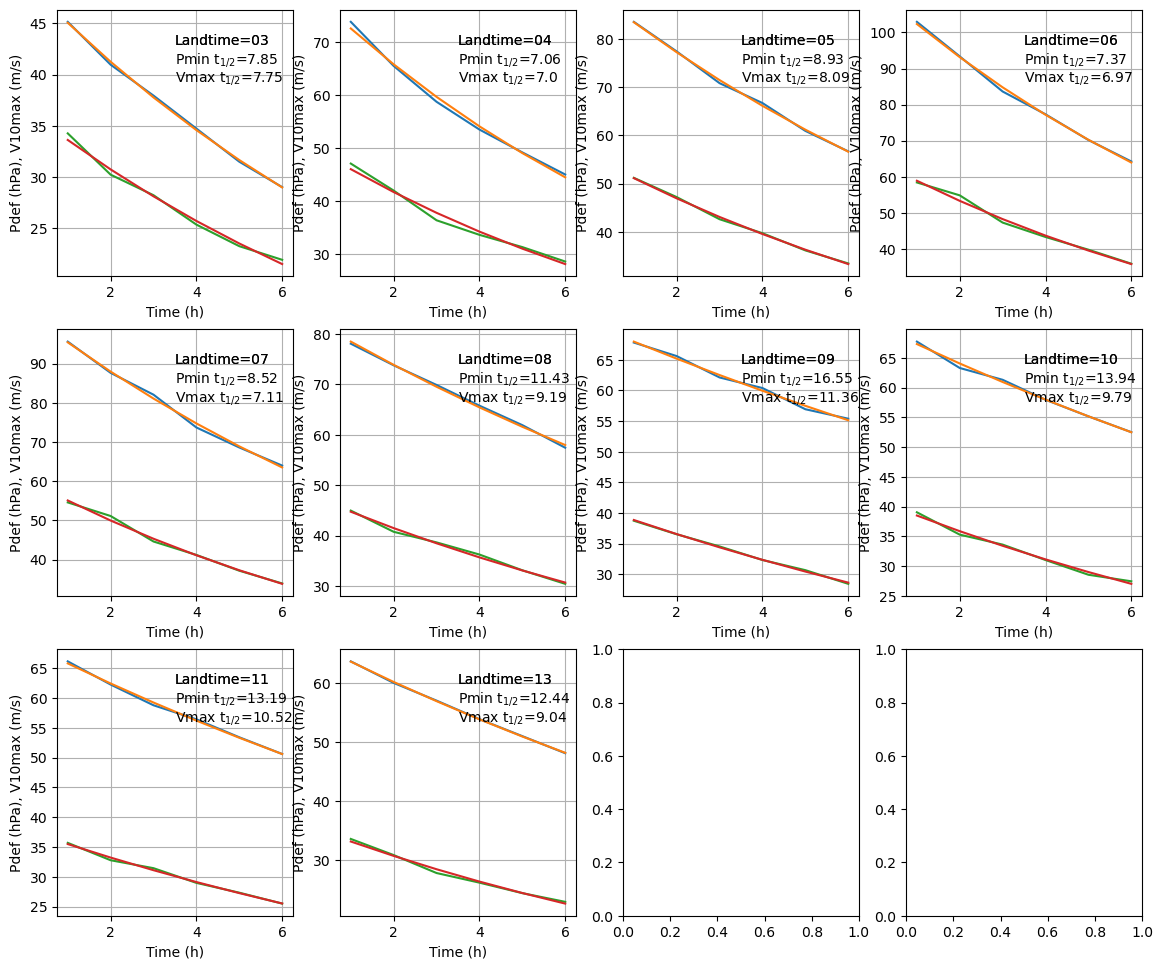

In [102]:
def pdef(p):
    return(1016-p)

fig, axs = plt.subplots(3,4,figsize=(14,12),dpi=100)
P0=[]
R0=[]
V0=[]
th_pd=[]
th_vm=[]
for n,df in enumerate(dfs):
    PD=pdef(df.pmin.values)
    V10max=df.V10max.values
    R0.append(df.rV10max.values[0])
    V0.append(V10max[0])
    P0.append(PD[0])

    th_pd.append(getHalfLife(PD,axs.flat[n],run=runs[n],tmin=1,tmax=6))
    th_vm.append(getHalfLife(V10max,axs.flat[n],run=runs[n],tmin=1,tmax=6,isvmax=1))
    
df_dec = pd.DataFrame(zip(day,th_pd, th_vm, P0, V0, R0), columns=['day','thalf_PD','thalf_V10max','PD0','V10max0','Rmax0'])
sname='../rundf/df_dec_' + rname + '_o.pkl'
df_dec.to_pickle(sname,protocol=4)
    